# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Count Through Data
record = 1
set = 1
# Create weatherPy dataframe
weather_df = pd.DataFrame({'City': cities})
weather_df['Lat'] = ''
weather_df['Lng'] = ''
weather_df['Max Temp'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''
print('Beginning Data Retrieval')
print('-------------------------------')
# Loop through weather_df
for index, row in weather_df.iterrows():
    city = row['City']
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    response = requests.get(url).json()
    try:
        print(f'Processing Record {record} of Set {set} | {city}')
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response["coord"]['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']["temp_max"]
        weather_df.loc[index, 'Humidity'] = response['main']["humidity"]
        weather_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        weather_df.loc[index, 'Wind Speed'] = response['wind']["speed"]
        weather_df.loc[index, 'Country'] = response['sys']["country"]
        weather_df.loc[index, 'Date'] = response['dt']
    except:
        print(f'City not found')
    record += 1
    if record == 51:
        record = 1
        set += 1
print('-------------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | dom pedrito
Processing Record 2 of Set 1 | yerofey pavlovich
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | obreja
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | luganville
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | marcona
City not found
Processing Record 15 of Set 1 | ibra
Processing Record 16 of Set 1 | puerto del rosario
Processing Record 17 of Set 1 | barentsburg
City not found
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | koga
Processing Record 21 of Set 1 | tombouctou
Processing Record 22 of Set 1 | butaritari
Processin

Processing Record 41 of Set 4 | buala
Processing Record 42 of Set 4 | mrirt
City not found
Processing Record 43 of Set 4 | orumiyeh
Processing Record 44 of Set 4 | moose factory
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | porto torres
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | tumannyy
City not found
Processing Record 50 of Set 4 | nizhneyansk
City not found
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | turayf
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | san alberto
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | san luis
Processing Record 9 of Set 5 | bunia
Processing Record 10 of Set 5 | karratha
Processing Record 11 of Set 5 | wahran
City not found
Processing Record 12 of Set 5 | cherskiy
Processing Record 13 of Set 5 | inderborskiy
C

Processing Record 34 of Set 8 | aasiaat
Processing Record 35 of Set 8 | peruibe
Processing Record 36 of Set 8 | ghoti
Processing Record 37 of Set 8 | hakkari
Processing Record 38 of Set 8 | mineros
Processing Record 39 of Set 8 | quatre cocos
Processing Record 40 of Set 8 | kaitangata
Processing Record 41 of Set 8 | eydhafushi
Processing Record 42 of Set 8 | muroto
Processing Record 43 of Set 8 | angoche
Processing Record 44 of Set 8 | atambua
Processing Record 45 of Set 8 | safford
Processing Record 46 of Set 8 | ola
Processing Record 47 of Set 8 | tambilil
Processing Record 48 of Set 8 | bone
Processing Record 49 of Set 8 | havre-saint-pierre
Processing Record 50 of Set 8 | saint anthony
Processing Record 1 of Set 9 | copiapo
Processing Record 2 of Set 9 | chengde
Processing Record 3 of Set 9 | omsukchan
Processing Record 4 of Set 9 | romodanovo
Processing Record 5 of Set 9 | ubinskoye
Processing Record 6 of Set 9 | severnyy
Processing Record 7 of Set 9 | cabo san lucas
Processing Re

Processing Record 28 of Set 12 | mulchen
Processing Record 29 of Set 12 | alekseyevsk
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | berbera
Processing Record 32 of Set 12 | mantua
Processing Record 33 of Set 12 | kefamenanu
Processing Record 34 of Set 12 | mana
Processing Record 35 of Set 12 | taoudenni
Processing Record 36 of Set 12 | burica
City not found
Processing Record 37 of Set 12 | qasigiannguit
Processing Record 38 of Set 12 | lata
Processing Record 39 of Set 12 | punta de piedra
Processing Record 40 of Set 12 | ambanja
Processing Record 41 of Set 12 | acarau
Processing Record 42 of Set 12 | trincomalee
Processing Record 43 of Set 12 | ponta do sol
Processing Record 44 of Set 12 | bosaso
Processing Record 45 of Set 12 | payakumbuh
Processing Record 46 of Set 12 | hirado
Processing Record 47 of Set 12 | port hardy
Processing Record 48 of Set 12 | jaisalmer
Processing Record 49 of Set 12 | lokosovo
Processing Record 50 of Set 12 | srednekolymsk
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.count()

City          622
Lat           622
Lng           622
Max Temp      622
Humidity      622
Cloudiness    622
Wind Speed    622
Country       622
Date          622
dtype: int64

In [6]:
weather_df.to_csv('city_data.csv')

In [7]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dom pedrito,-30.98,-54.67,284.41,69,0,3.74,BR,1595706652
1,yerofey pavlovich,53.97,121.97,290.52,96,100,0.68,RU,1595706652
2,clyde river,70.47,-68.59,289.15,48,1,10.8,CA,1595706652
3,thompson,55.74,-97.86,299.15,50,40,4.6,CA,1595706652
4,bethel,41.37,-73.41,304.26,51,40,5.1,US,1595706510
...,...,...,...,...,...,...,...,...,...
617,yamada,39.47,141.95,293.07,92,100,1.51,JP,1595706743
618,kodinsk,58.69,99.18,287.29,64,97,1.47,RU,1595706743
619,mahadday weyne,,,,,,,,
620,san jeronimo,-11.95,-75.28,289.16,35,63,2.16,PE,1595706743


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
hhcities = weather_df.loc[weather_df["Humidity"] > 100]
hhcities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

## Latitude vs. Temperature Plot

In [13]:
# Create new database for Scatter Plot
lat_vs_temp = weather_df[["Lat", "Max Temp"]]

# Turn values in "Max Temp" into fahrenheit instead of calvin
lat_vs_temp["Max Temp (F)"] = lat_vs_temp["Max Temp"] * 9/5 - 459.67

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


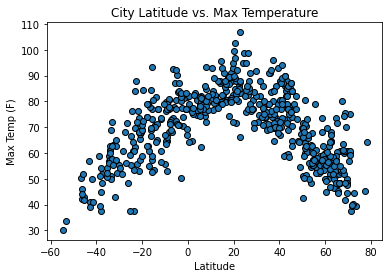

In [14]:
lat_vs_temp["Lat"] = pd.to_numeric(lat_vs_temp["Lat"])
lat_vs_temp["Max Temp"] = pd.to_numeric(lat_vs_temp["Max Temp"])
x_axis = lat_vs_temp["Lat"]
y_axis = lat_vs_temp["Max Temp (F)"]
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Latitude vs. Humidity Plot

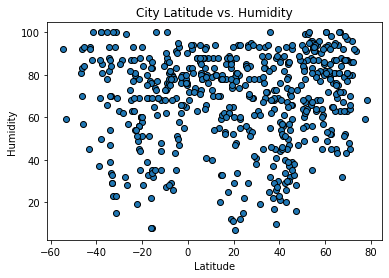

In [15]:
lat_vs_hum = weather_df[["Lat", "Humidity"]]
x_axis = lat_vs_hum["Lat"]
y_axis = lat_vs_hum["Humidity"]
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Latitude vs. Cloudiness Plot

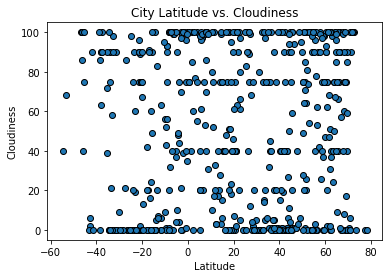

In [16]:
lat_vs_cloud = weather_df[["Lat", "Cloudiness"]]
lat_vs_cloud.dtypes
x_axis = lat_vs_cloud["Lat"]
y_axis = lat_vs_cloud["Cloudiness"]
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Latitude vs. Wind Speed Plot

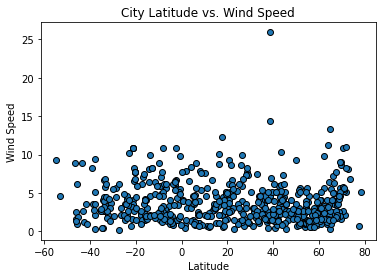

In [17]:
lat_vs_wind = weather_df[["Lat", "Wind Speed"]]
x_axis = lat_vs_wind["Lat"]
y_axis = lat_vs_wind["Wind Speed"]
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_reg(x_axis, y_axis):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
   regress_values = x_axis * slope + intercept
   line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
   plt.plot(x_axis, regress_values,"r")
   plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df[weather_df['Lat']>1]
south_hemi = weather_df[weather_df['Lat']<1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


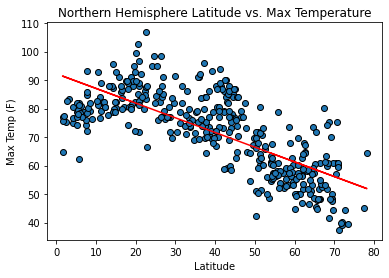

In [20]:

north_hemi["Max Temp (F)"] = north_hemi["Max Temp"] * 9/5 - 459.67
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Max Temp (F)"]
plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


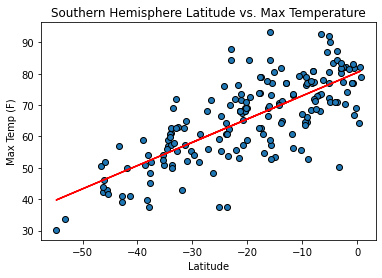

In [21]:
south_hemi["Max Temp (F)"] = south_hemi["Max Temp"] * 9/5 - 459.67
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Max Temp (F)"]
plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

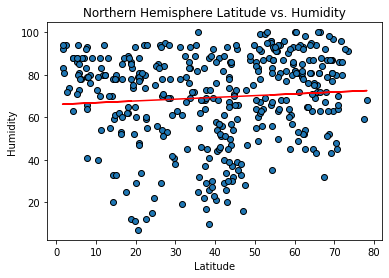

In [29]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Humidity"]
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

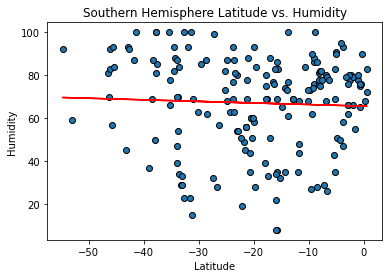

In [30]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Humidity"]
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

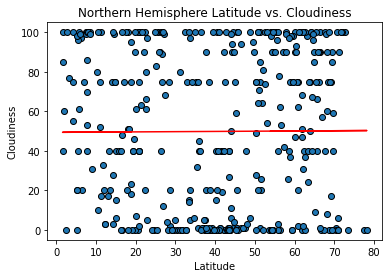

In [31]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Cloudiness"]
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

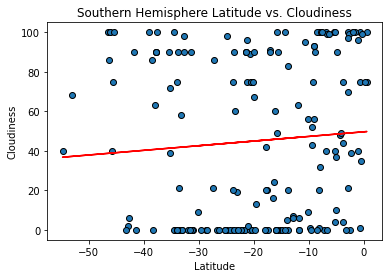

In [32]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Cloudiness"]
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

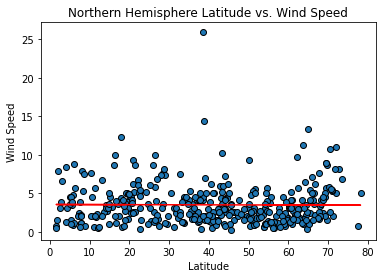

In [33]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Wind Speed"]
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

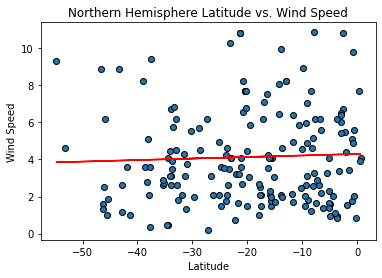

In [34]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Wind Speed"]
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)